# U.S. Medical Insurance Costs

In [69]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

input_csv_file = 'insurance.csv'

## Load CSV Input File

* Load the CSV input file into a Pandas DataFrame object.
* Show the number of records (rows) and fields (columns) in the DataFrame.
* Show the first 10 records.

In [19]:
ins_df = pd.read_csv(input_csv_file)
n_samples, n_fields = ins_df.shape
print(f'Dataset contains {n_samples} records, with {n_fields} fields.')
print('The top 10 records:')
ins_df.head(10)

Dataset contains 1338 records, with 7 fields.
The top 10 records:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Find All Records With Missing Values

* Find all records (rows) with one or more missing value (or NaN).
* Show the number of records with missing value.
* Show the first 10 records with missing value (if any)

In [22]:
# Returns 1d bool np.array, True element indicates a row with at least one null value in the 7 columns. 
rows_w_nan = ins_df.isnull().any(axis=1)

# Count how many rows contain null value, and show top 10 records.
if np.sum(rows_w_nan==True) > 0:
    print(f'Num of records with missing value: {np.sum(rows_w_nan==True)}')
    print('First 10 records with missing value:')
    ins_df.loc[rows_w_nan].head(10)
else:
    print('No record with missing value.')

No record with missing value.


## Project Scope

1. Find the number of male and female.
2. Generate the statistics of:<br>
   2.1. Age overall and by gender.<br>
   2.2. BMI overall and by gender.<br>
   2.3. Smoker overall and by gender.<br>
   2.3. Insurance cost overall and by gender.<br>
3. Find the number of smoker and non-smoker.<br>
    3.1. Smoker status by gender.
    3.2. Insurance cost statistics by smoker status. 

In [42]:
findings = {}

'''
Gender break down.
'''

male_female_count = ins_df.sex.value_counts()
print(male_female_count)
findings['by_gender'] = {}
findings['by_gender'][male_female_count.index[0]] = {}
findings['by_gender'][male_female_count.index[1]] = {}
findings['by_gender'][male_female_count.index[0]]['count'] = male_female_count.iloc[0]
findings['by_gender'][male_female_count.index[1]]['count'] = male_female_count.iloc[1]
print(findings)

sex
male      676
female    662
Name: count, dtype: int64
{'by_gender': {'male': {'count': 676}, 'female': {'count': 662}}}


In [57]:
'''
Overall Age statistics.
'''

print(ins_df.age.describe())
stats_dict = ins_df.age.describe().to_dict()
findings['age_statistics'] = stats_dict

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


        count       mean        std   min   25%   50%    75%   max
sex                                                               
female  662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0
male    676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0


female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

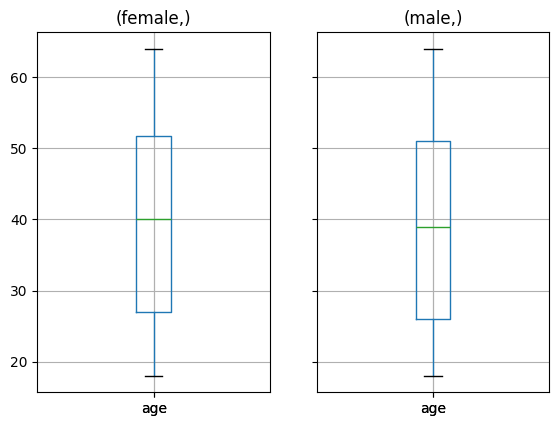

In [84]:
'''
Age statistics by gender
'''
age_stats_by_gender = ins_df.groupby(['sex']).age.describe()
print(age_stats_by_gender)
findings['by_gender'][age_stats_by_gender.index[0]]['age_statistics'] = age_stats_by_gender.iloc[0].to_dict()
findings['by_gender'][age_stats_by_gender.index[1]]['age_statistics'] = age_stats_by_gender.iloc[1].to_dict()

'''
Boxplots of age by gender.
'''
ins_df.groupby(['sex']).boxplot(column=['age'], sharex=True, sharey=True, layout=(1,2))

In [85]:
'''
Overall BMI statistics.
'''

print(ins_df.age.describe())
stats_dict = ins_df.bmi.describe().to_dict()
findings['bmi_statistics'] = stats_dict

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

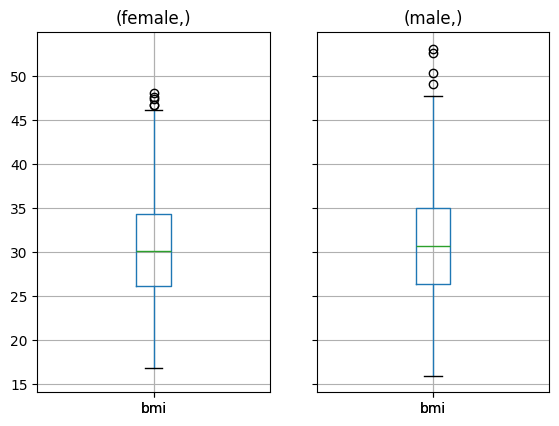

In [86]:
'''
BMI statistics by gender
'''
bmi_stats_by_gender = ins_df.groupby(['sex']).bmi.describe()
print(bmi_stats_by_gender)
findings['by_gender'][bmi_stats_by_gender.index[0]]['bmi_statistics'] = bmi_stats_by_gender.iloc[0].to_dict()
findings['by_gender'][bmi_stats_by_gender.index[1]]['bmi_statistics'] = bmi_stats_by_gender.iloc[1].to_dict()

'''
Boxplots of age by gender.
'''
ins_df.groupby(['sex']).boxplot(column=['bmi'], sharex=True, sharey=True, layout=(1,2))

In [89]:
'''
Smoker breakdown
'''

print(ins_df.smoker.value_counts())
smoker_dict = ins_df.smoker.value_counts().to_dict()
findings['smoker_data'] = smoker_dict

smoker
no     1064
yes     274
Name: count, dtype: int64


In [98]:
'''
Smoker breakdown by gender
'''

print(ins_df.groupby(['smoker']).sex.value_counts())
smoker_by_gender_dict = ins_df.groupby(['smoker']).sex.value_counts().to_dict()
findings['smoker_by_gender'] = smoker_by_gender_dict

smoker  sex   
no      female    547
        male      517
yes     male      159
        female    115
Name: count, dtype: int64


         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


no          Axes(0.1,0.15;0.363636x0.75)
yes    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

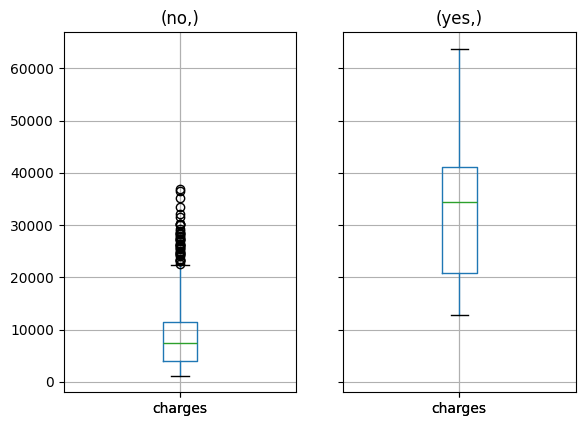

In [111]:
'''
Insurance cost statistics by smoker status.
'''
ins_cost_by_smoker_status = ins_df.groupby(['smoker']).charges.describe()
print(ins_cost_by_smoker_status)
findings['cost_by_smoker_status'] = {}
findings['cost_by_smoker_status'][ins_cost_by_smoker_status.index[0]] = ins_cost_by_smoker_status.iloc[0].to_dict()
findings['cost_by_smoker_status'][ins_cost_by_smoker_status.index[1]] = ins_cost_by_smoker_status.iloc[1].to_dict()

ins_df.groupby(['smoker']).boxplot(column=['charges'], sharex=True, sharey=True, layout=(1,2))

In [109]:
'''
Overall cost statistics.
'''
print(ins_df.charges.describe())
findings['cost_statistics'] = ins_df.charges.describe().to_dict()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


        count          mean           std        min        25%         50%  \
sex                                                                           
female  662.0  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male    676.0  13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309  


female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

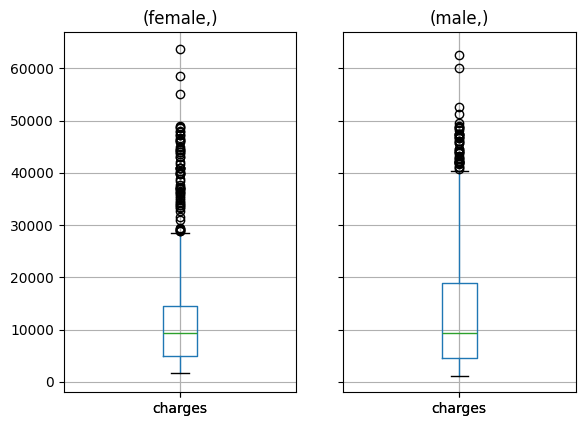

In [112]:
'''
Insurance cost statistics by gender.
'''

ins_cost_by_gender = ins_df.groupby(['sex']).charges.describe()
print(ins_cost_by_gender)
findings['cost_by_gender'] = {}
findings['cost_by_gender'][ins_cost_by_gender.index[0]] = ins_cost_by_gender.iloc[0].to_dict()
findings['cost_by_gender'][ins_cost_by_gender.index[1]] = ins_cost_by_gender.iloc[1].to_dict()
ins_df.groupby(['sex']).boxplot(column=['charges'], sharex=True, sharey=True, layout=(1,2))

<Axes: title={'center': 'Age-v-Cost Correlation'}, xlabel='age', ylabel='charges'>

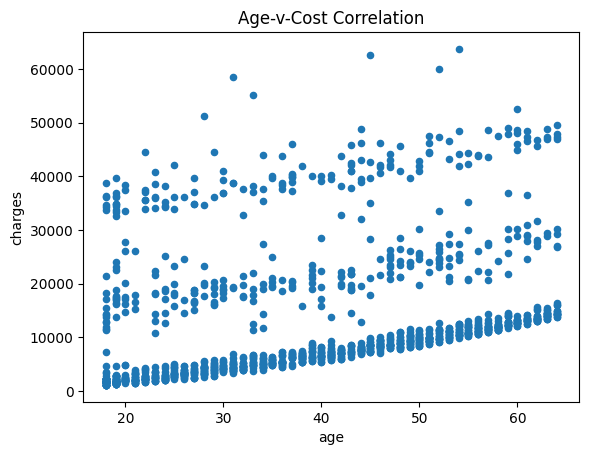

In [117]:
'''
Cost vs age
'''
ins_df.plot.scatter(x='age', y='charges', title='Age-v-Cost Correlation')

In [120]:
'''
Calculate Pearson correlation coefficients between numerical fields.
How do we assess the effect of categorical fields to the insurance cost?
'''

ins_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000
